**Mise en forme des données**

In [22]:
import numpy as np
import pandas as pd

In [23]:
uci = pd.read_csv('UCI_Credit_Card.csv', delimiter=',')
print(uci.values.shape)
X = uci.values[:, 1:-1]
Y = uci.values[:,-1]

size = len(Y)

perm = np.arange(size)
np.random.shuffle(perm)

X_train = X[perm[0:20000], :]
Y_train = Y[perm[0:20000]]
X_val = X[perm[20000:25000],:]
Y_val = Y[perm[20000:25000]]
X_test = X[perm[25000:], :]
Y_test = Y[perm[25000:]]

print(f'{X_train.shape} training samples, {X_val.shape} validation sampels, {X_test.shape} test samples')

(30000, 25)
(20000, 23) training samples, (5000, 23) validation sampels, (5000, 23) test samples


In [24]:
uci

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


**Affichage des données en 2D**

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

cmap = ListedColormap(['#0000FF', '#FF0000'])

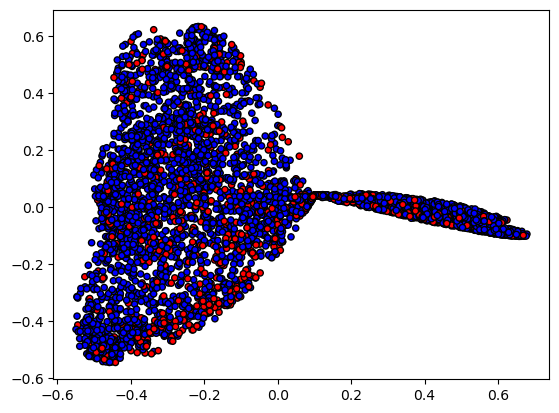

In [26]:
minmax = MinMaxScaler(feature_range=(-1,1))
X = minmax.fit_transform(X_val)

proj = KernelPCA(n_components=2, kernel='rbf', gamma=1.0)
X_pca = proj.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y_val, cmap=cmap, edgecolors='k', s=20)

**Méthodes linéares**

Accuracy (Linear Regression): 19.98%


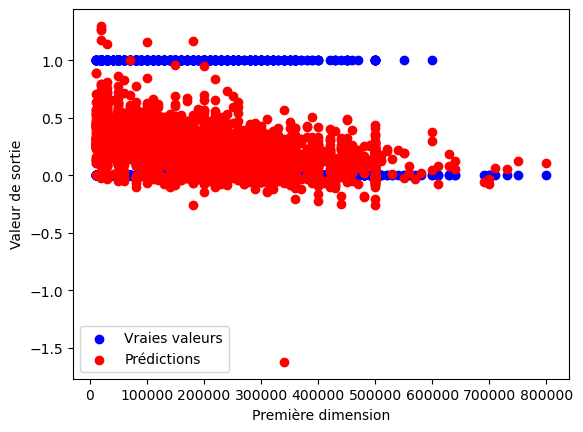

In [27]:
def linear_regression(X, Y):
    X_with_bias = np.c_[np.ones(X.shape[0]), X]
    
    beta = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ Y
    
    return beta

beta = linear_regression(X_train, Y_train)

Y_val_pred = np.c_[np.ones(X_val.shape[0]), X_val] @ beta

Y_val_pred_linear_regression = np.dot(np.c_[np.ones(X_val.shape[0]), X_val], beta)

accuracy_linear_regression = np.sum(np.sign(Y_val_pred_linear_regression) == Y_val) / len(Y_val)

print(f'Accuracy (Linear Regression): {accuracy_linear_regression * 100:.2f}%')

plt.scatter(X_val[:, 0], Y_val, color='blue', label='Vraies valeurs')
plt.scatter(X_val[:, 0], Y_val_pred, color='red', label='Prédictions')
plt.xlabel('Première dimension')
plt.ylabel('Valeur de sortie')
plt.legend()
plt.show()

**k-nearest neighbors**

Accuracy (k-NN): 44.96%


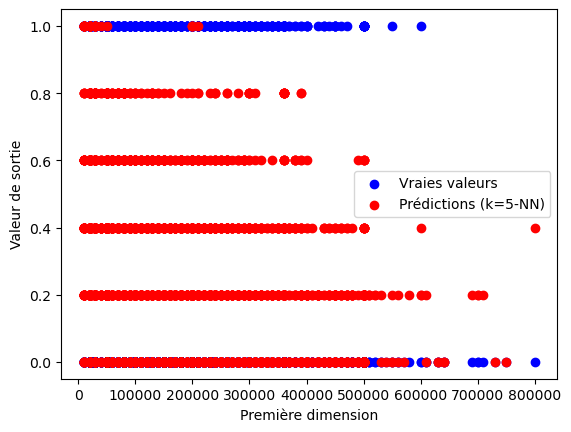

In [29]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


def k_nearest_neighbors_regression(X_train, Y_train, X_val, k):
    Y_val_pred = []

    for x_val in X_val:

        distances = np.array([euclidean_distance(x_val, x_train) for x_train in X_train])
        
        k_neighbors_indices = np.argsort(distances)[:k]
        
        y_val_pred = np.mean(Y_train[k_neighbors_indices])
        
        Y_val_pred.append(y_val_pred)

    return np.array(Y_val_pred)

k = 5

Y_val_pred_knn = k_nearest_neighbors_regression(X_train, Y_train, X_val, k)
accuracy_knn = np.sum(np.sign(Y_val_pred_knn) == Y_val) / len(Y_val)

print(f'Accuracy (k-NN): {accuracy_knn * 100:.2f}%')


plt.scatter(X_val[:, 0], Y_val, color='blue', label='Vraies valeurs')
plt.scatter(X_val[:, 0], Y_val_pred_knn, color='red', label=f'Prédictions (k={k}-NN)')
plt.xlabel('Première dimension')
plt.ylabel('Valeur de sortie')
plt.legend()
plt.show()

**Decision trees**

Accuracy (Decision Tree): 20.98%


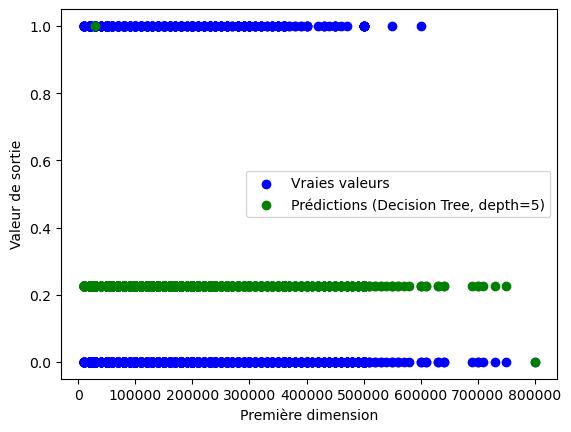

In [30]:
def split_data(X, Y, feature_index, threshold):
    left_mask = X[:, feature_index] <= threshold
    right_mask = ~left_mask
    return X[left_mask], Y[left_mask], X[right_mask], Y[right_mask]

def calculate_mse(Y):
    if len(Y) == 0:
        return 0
    mean_value = np.mean(Y)
    return np.mean((Y - mean_value)**2)

def find_best_split(X, Y):
    num_features = X.shape[1]
    best_feature_index, best_threshold, min_mse = None, None, float('inf')

    for feature_index in range(num_features):
        unique_values = np.unique(X[:, feature_index])
        thresholds = (unique_values[:-1] + unique_values[1:]) / 2

        for threshold in thresholds:
            _, Y_left, _, Y_right = split_data(X, Y, feature_index, threshold)
            mse = calculate_mse(Y_left) + calculate_mse(Y_right)

            if mse < min_mse:
                min_mse = mse
                best_feature_index = feature_index
                best_threshold = threshold

    return best_feature_index, best_threshold

def build_decision_tree(X, Y, depth=0, max_depth=None):
    if depth == max_depth or len(np.unique(Y)) == 1:
        return np.mean(Y)


    best_feature_index, best_threshold = find_best_split(X, Y)

    if best_feature_index is None:
        return np.mean(Y)

    X_left, Y_left, X_right, Y_right = split_data(X, Y, best_feature_index, best_threshold)

    left_subtree = build_decision_tree(X_left, Y_left, depth + 1, max_depth)
    right_subtree = build_decision_tree(X_right, Y_right, depth + 1, max_depth)

    return {'feature_index': best_feature_index, 'threshold': best_threshold,
            'left': left_subtree, 'right': right_subtree}

def predict(tree, x):
    if isinstance(tree, dict):
        if x[tree['feature_index']] <= tree['threshold']:
            return predict(tree['left'], x)
        else:
            return predict(tree['right'], x)
    else:
        return tree

max_depth = 5
decision_tree = build_decision_tree(X_train, Y_train, max_depth=max_depth)

Y_val_pred_tree = np.array([predict(decision_tree, x) for x in X_val])
accuracy_tree = np.sum(np.sign(Y_val_pred_tree) == Y_val) / len(Y_val)

print(f'Accuracy (Decision Tree): {accuracy_tree * 100:.2f}%')


plt.scatter(X_val[:, 0], Y_val, color='blue', label='Vraies valeurs')
plt.scatter(X_val[:, 0], Y_val_pred_tree, color='green', label=f'Prédictions (Decision Tree, depth={max_depth})')
plt.xlabel('Première dimension')
plt.ylabel('Valeur de sortie')
plt.legend()
plt.show()

**SVM**

Accuracy (SVM): 79.04%


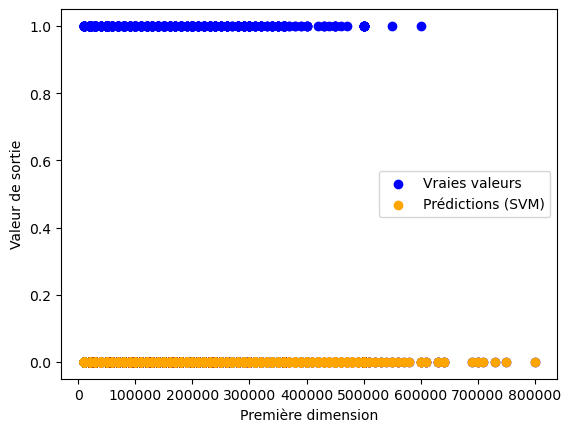

In [34]:
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def train_svm(X, Y, C, tol=0.001, max_passes=5):
    m, n = X.shape
    alphas = np.zeros(m)
    b = 0
    passes = 0

    while passes < max_passes:
        num_changed_alphas = 0
        for i in range(m):
            Ei = np.dot(alphas * Y, linear_kernel(X, X[i])) + b - Y[i]
            if (Y[i] * Ei < -tol and alphas[i] < C) or (Y[i] * Ei > tol and alphas[i] > 0):
                j = np.random.choice(list(range(i)) + list(range(i + 1, m)))
                Ej = np.dot(alphas * Y, linear_kernel(X, X[j])) + b - Y[j]

                alpha_i_old, alpha_j_old = alphas[i], alphas[j]

                if Y[i] != Y[j]:
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[i] + alphas[j] - C)
                    H = min(C, alphas[i] + alphas[j])

                if L == H:
                    continue

                eta = 2 * linear_kernel(X[i], X[j]) - linear_kernel(X[i], X[i]) - linear_kernel(X[j], X[j])

                if eta >= 0:
                    continue

                alphas[j] -= (Y[j] * (Ei - Ej)) / eta
                alphas[j] = max(L, min(H, alphas[j]))

                if abs(alphas[j] - alpha_j_old) < tol:
                    alphas[j] = alpha_j_old
                    continue

                alphas[i] += Y[i] * Y[j] * (alpha_j_old - alphas[j])

                b1 = b - Ei - Y[i] * (alphas[i] - alpha_i_old) * linear_kernel(X[i], X[i]) - \
                     Y[j] * (alphas[j] - alpha_j_old) * linear_kernel(X[i], X[j])
                b2 = b - Ej - Y[i] * (alphas[i] - alpha_i_old) * linear_kernel(X[i], X[j]) - \
                     Y[j] * (alphas[j] - alpha_j_old) * linear_kernel(X[j], X[j])

                if 0 < alphas[i] < C:
                    b = b1
                elif 0 < alphas[j] < C:
                    b = b2
                else:
                    b = (b1 + b2) / 2

                num_changed_alphas += 1

        if num_changed_alphas == 0:
            passes += 1
        else:
            passes = 0

    return alphas, b

def predict_svm(X, alphas, b):
    m = X.shape[0]
    predictions = np.zeros(m)

    for i in range(m):
        prediction = b
        for alpha, y, x_train in zip(alphas, Y_train, X_train):
            prediction += alpha * y * linear_kernel(X[i], x_train)
        predictions[i] = prediction

    return np.sign(predictions)

Y_val_pred_svm = predict_svm(X_val, alphas, b)

accuracy_svm = np.sum(np.sign(Y_val_pred_svm) == Y_val) / len(Y_val)

print(f'Accuracy (SVM): {accuracy_svm * 100:.2f}%')

plt.scatter(X_val[:, 0], Y_val, color='blue', label='Vraies valeurs')
plt.scatter(X_val[:, 0], Y_val_pred_svm, color='orange', label='Prédictions (SVM)')
plt.xlabel('Première dimension')
plt.ylabel('Valeur de sortie')
plt.legend()
plt.show()

**Boosting**

Accuracy (AdaBoost): 20.96%


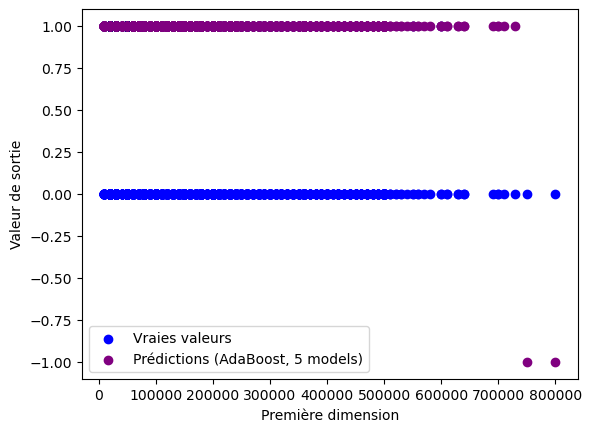

In [35]:
def train_weak_model(X, Y, weights):
    m = len(Y)
    total_weight = np.sum(weights)

    weight_positive = np.sum(weights[Y == 1]) / total_weight
    weight_negative = np.sum(weights[Y == -1]) / total_weight

    min_error = float('inf')
    best_dim, best_threshold, best_polarity = None, None, None

    for dim in range(X.shape[1]):
        thresholds = np.unique(X[:, dim])

        for threshold in thresholds:
            for polarity in [1, -1]:
                predictions = polarity * np.ones(m)
                predictions[X[:, dim] <= threshold] = -polarity

                errors = weights[predictions != Y]
                weighted_error = np.sum(errors)

                if weighted_error < min_error:
                    min_error = weighted_error
                    best_dim = dim
                    best_threshold = threshold
                    best_polarity = polarity

    alpha = 0.5 * np.log((1 - min_error) / max(min_error, 1e-10))

    weights *= np.exp(-alpha * Y * best_polarity * np.sign(X[:, best_dim] - best_threshold))
    weights /= np.sum(weights)  

    return {'dimension': best_dim, 'threshold': best_threshold, 'polarity': best_polarity, 'alpha': alpha}

def predict_boosted_model(X, weak_models):
    m = X.shape[0]
    predictions = np.zeros(m)

    for model in weak_models:
        decision = np.ones(m)
        decision[X[:, model['dimension']] <= model['threshold']] = -1
        predictions += model['alpha'] * decision

    return np.sign(predictions)

def train_adaboost(X, Y, num_models):
    m = len(Y)
    weights = np.ones(m) / m  
    weak_models = []

    for _ in range(num_models):
        weak_model = train_weak_model(X, Y, weights)
        weak_models.append(weak_model)

    return weak_models


num_models = 5
boosted_models = train_adaboost(X_train, Y_train, num_models)


Y_val_pred_boosted = predict_boosted_model(X_val, boosted_models)
accuracy_boosted = np.sum(Y_val_pred_boosted == Y_val) / len(Y_val)

print(f'Accuracy (AdaBoost): {accuracy_boosted * 100:.2f}%')

plt.scatter(X_val[:, 0], Y_val, color='blue', label='Vraies valeurs')
plt.scatter(X_val[:, 0], Y_val_pred_boosted, color='purple', label=f'Prédictions (AdaBoost, {num_models} models)')
plt.xlabel('Première dimension')
plt.ylabel('Valeur de sortie')
plt.legend()
plt.show()
